In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Moldex internship/MPC51.csv',encoding='latin-1')
data

,type,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#Cleaning

In [4]:
data['type'].value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
data['email']= data['email'].str.lower()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
stopwords= set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([words for words in str(text).split() if words not in stopwords])
data['email']= data['email'].apply(lambda x: remove_stopwords(x))
data['email'].head()

0    go jurong point, crazy.. available bugis n gre...
1                        ok lar... joking wif u oni...
2    free entry 2 wkly comp win fa cup final tkts 2...
3            u dun say early hor... u c already say...
4              nah think goes usf, lives around though
Name: email, dtype: object

In [8]:
data['email']= data['email'].str.replace('[^\w\s]','', regex=True)
data['email']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å750 pound prize ...
5568                         ì_ b going esplanade fr home
5569                    pity  mood that soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: email, Length: 5572, dtype: object

In [10]:
import string
count=0
l= dict()
spc= string.punctuation
import string
for words in data['email']:
  for i in words:
    if (i) in spc:
      if i in l:
        l[i]+=1
      else:
        l[i]=1
print(l)

{'_': 152}


In [11]:
from nltk.stem.porter import *
def clean_num(text):
  return re.sub('[0-9]+', '', text)
data['email']= data['email'].apply(lambda x: clean_num(x))
data['email']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry  wkly comp win fa cup final tkts st...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried  contact u u å pound prize  clai...
5568                         ì_ b going esplanade fr home
5569                    pity  mood that soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: email, Length: 5572, dtype: object

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
from re import X
lm = nltk.WordNetLemmatizer()
def lemma(text):
  data=  [lm.lemmatize(words) for words in text]
  return text
data['email']= data['email'].apply(lambda  x: lemma(x))
data.sample(10)

,type,email
142,ham,swt thought nver get tired little things lova...
4318,ham,still playing gautham
2839,ham,babe miiiiiiissssssssss need crave geeee...
3191,ham,ur paper today e morn aft
1170,ham,yeah probably swing roommate finishes girl
2840,ham,ok thanx
4207,ham,go home first lar ì_ wait lor put stuff first
3793,ham,short cute be good person
3757,ham,lol ouch wish id stayed bit longer
666,ham,carlosll minute still need buy


#Vectorizing

In [14]:
data['type']= data['type'].map({'ham':0, 'spam':1})

In [15]:
train,test = train_test_split(data,test_size = 0.2,random_state=0,stratify = data['type'].values)
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (4457, 2)
test shape :  (1115, 2)


In [16]:
vectorizer = CountVectorizer(decode_error = 'replace')

x_train= vectorizer.fit_transform(train['email'])
x_test= vectorizer.transform(test['email'])

y_train = train['type'].values
y_test = test['type'].values

print("X_train.shape : ", x_train.shape)
print("X_test.shape : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (4457, 7488)
X_test.shape :  (1115, 7488)
y_train.shape :  (4457,)
y_test.shape :  (1115,)


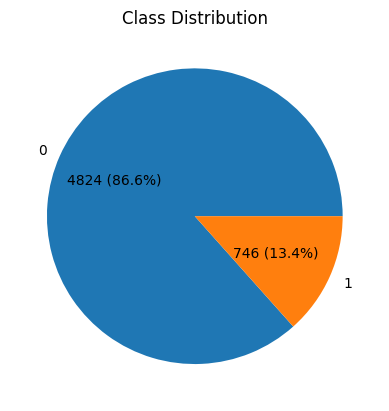

In [19]:
value_counts = data['type'].value_counts()

plt.pie(value_counts, labels=value_counts.index, autopct=lambda pct: f'{int(pct*sum(value_counts)/100)} ({pct:.1f}%)')
plt.title('Class Distribution')
plt.show()


***
#Word cloud of not spam messages
***

(-0.5, 799.5, 399.5, -0.5)

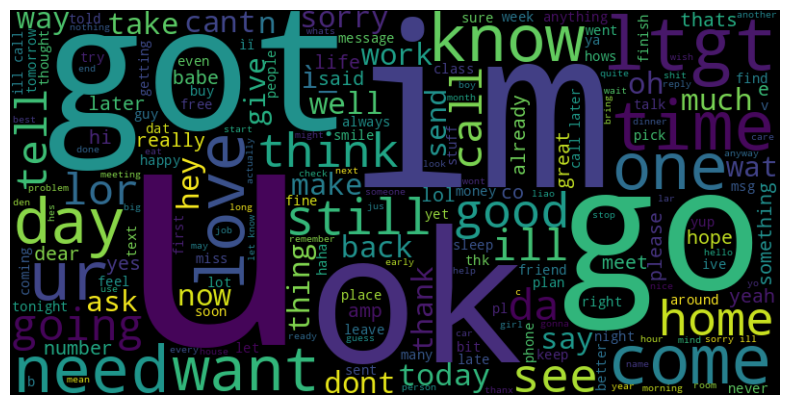

In [26]:
all_words= ' '.join([word for word in data['email'][data['type'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

***
#Word cloud of spam messages
***

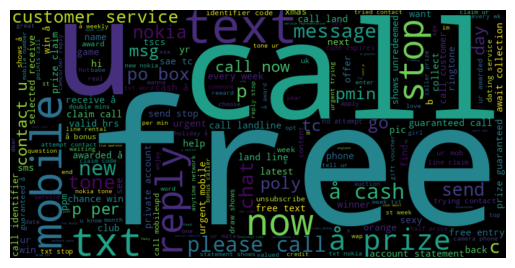

In [25]:
all_words= " ".join([words for words in data['email'][data['type']==1]])
wordcloud = WordCloud(width =800, height=400, background_color='black').generate(all_words)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(x_train,y_train)

NB_prediction = naiveByes_clf.predict(x_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(x_train,y_train))
print("test accuracy Score : ",NB_accuracy )
print(classification_report(y_test,NB_prediction))

training accuracy Score    :  0.9932690150325331
test accuracy Score :  0.9748878923766816
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.95      0.86      0.90       149

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train,y_train)

DT_prediction = dt_clf.predict(x_test)
DT_accuracy = accuracy_score(y_test,DT_prediction)

print("training accuracy Score    : ",dt_clf.score(x_train,y_train))
print("test accuracy Score : ",DT_accuracy )

training accuracy Score    :  1.0
test accuracy Score :  0.9542600896860987


In [ ]:
print(classification_report(y_test,DT_prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       966
           1       0.87      0.77      0.82       149

    accuracy                           0.95      1115
   macro avg       0.92      0.88      0.90      1115
weighted avg       0.95      0.95      0.95      1115



#Random Forest with grid search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
   'n_estimators': [50, 100, 200],
    'max_depth': [15, 16,18],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

{'max_depth': 18, 'min_samples_leaf': 1, 'n_estimators': 200}

***
* Little Modifications with the Best parameters
***

In [ ]:
rm= RandomForestClassifier(max_depth= 14,
 min_samples_leaf= 1,
n_estimators= 100)
rm.fit(x_train,y_train)
RF_prediction = rm.predict(x_test)
RF_accuracy = accuracy_score(y_test,RF_prediction)
print("training accuracy Score    : ",rm.score(x_train,y_train))
print("test accuracy Score : ",RF_accuracy )

training accuracy Score    :  0.923939869867624
test accuracy Score :  0.9130044843049328


***
#Result
Now our Random Forst model with little modification in the best parameters is giving best result with accuracy score of test data= 91%
***